# 선형회귀 실습

In [4]:
# 필요한 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #시각화 모듈

In [5]:
df = pd.read_csv("Life-Expectancy-Data-Updated.csv")

데이터 출처 : https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated

## 데이터 확인 및 시각화

In [6]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
Year,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,0.139858,0.145143,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,4.975598e-15,0.174359
Infant_deaths,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,4.758662e-01,-0.920032
Under_five_deaths,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,4.271342e-01,-0.920419
Adult_mortality,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,4.293748e-01,-0.945360
Alcohol_consumption,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,-6.703661e-01,0.399159
Hepatitis_B,1.768241e-01,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,1.135340e-01,-1.135340e-01,0.417804
Measles,8.594472e-02,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,2.986933e-01,-2.986933e-01,0.490019
BMI,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,-2.432870e-01,0.598423
Polio,1.398584e-01,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765,2.832601e-01,-2.832601e-01,0.641217
Diphtheria,1.451429e-01,-0.721875,-0.725355,-0.513803,0.299016,0.761780,0.494059,0.426501,0.953178,1.000000,-0.146932,0.313321,-0.027336,-0.304466,-0.295597,0.535621,2.894172e-01,-2.894172e-01,0.627541


<ipython-input-8-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

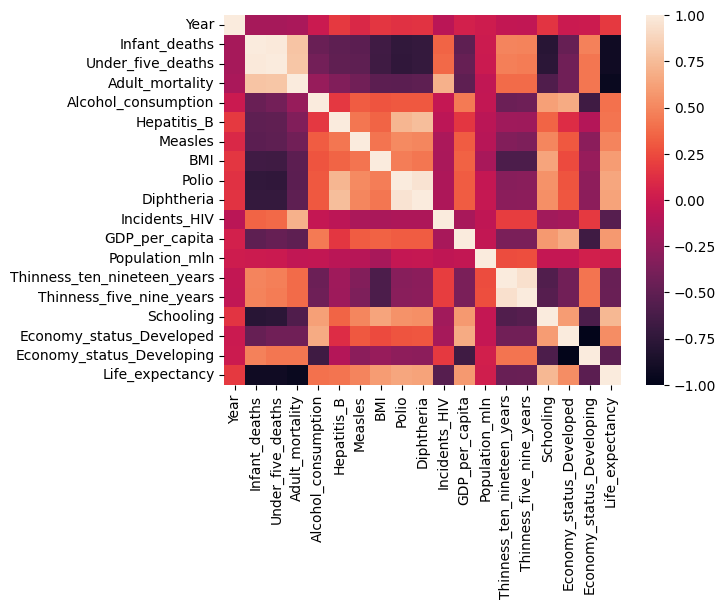

In [8]:
sns.heatmap(df.corr())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Middle East'),
  Text(1, 0, 'European Union'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Central America and Caribbean'),
  Text(5, 0, 'Rest of Europe'),
  Text(6, 0, 'Africa'),
  Text(7, 0, 'Oceania'),
  Text(8, 0, 'North America')])

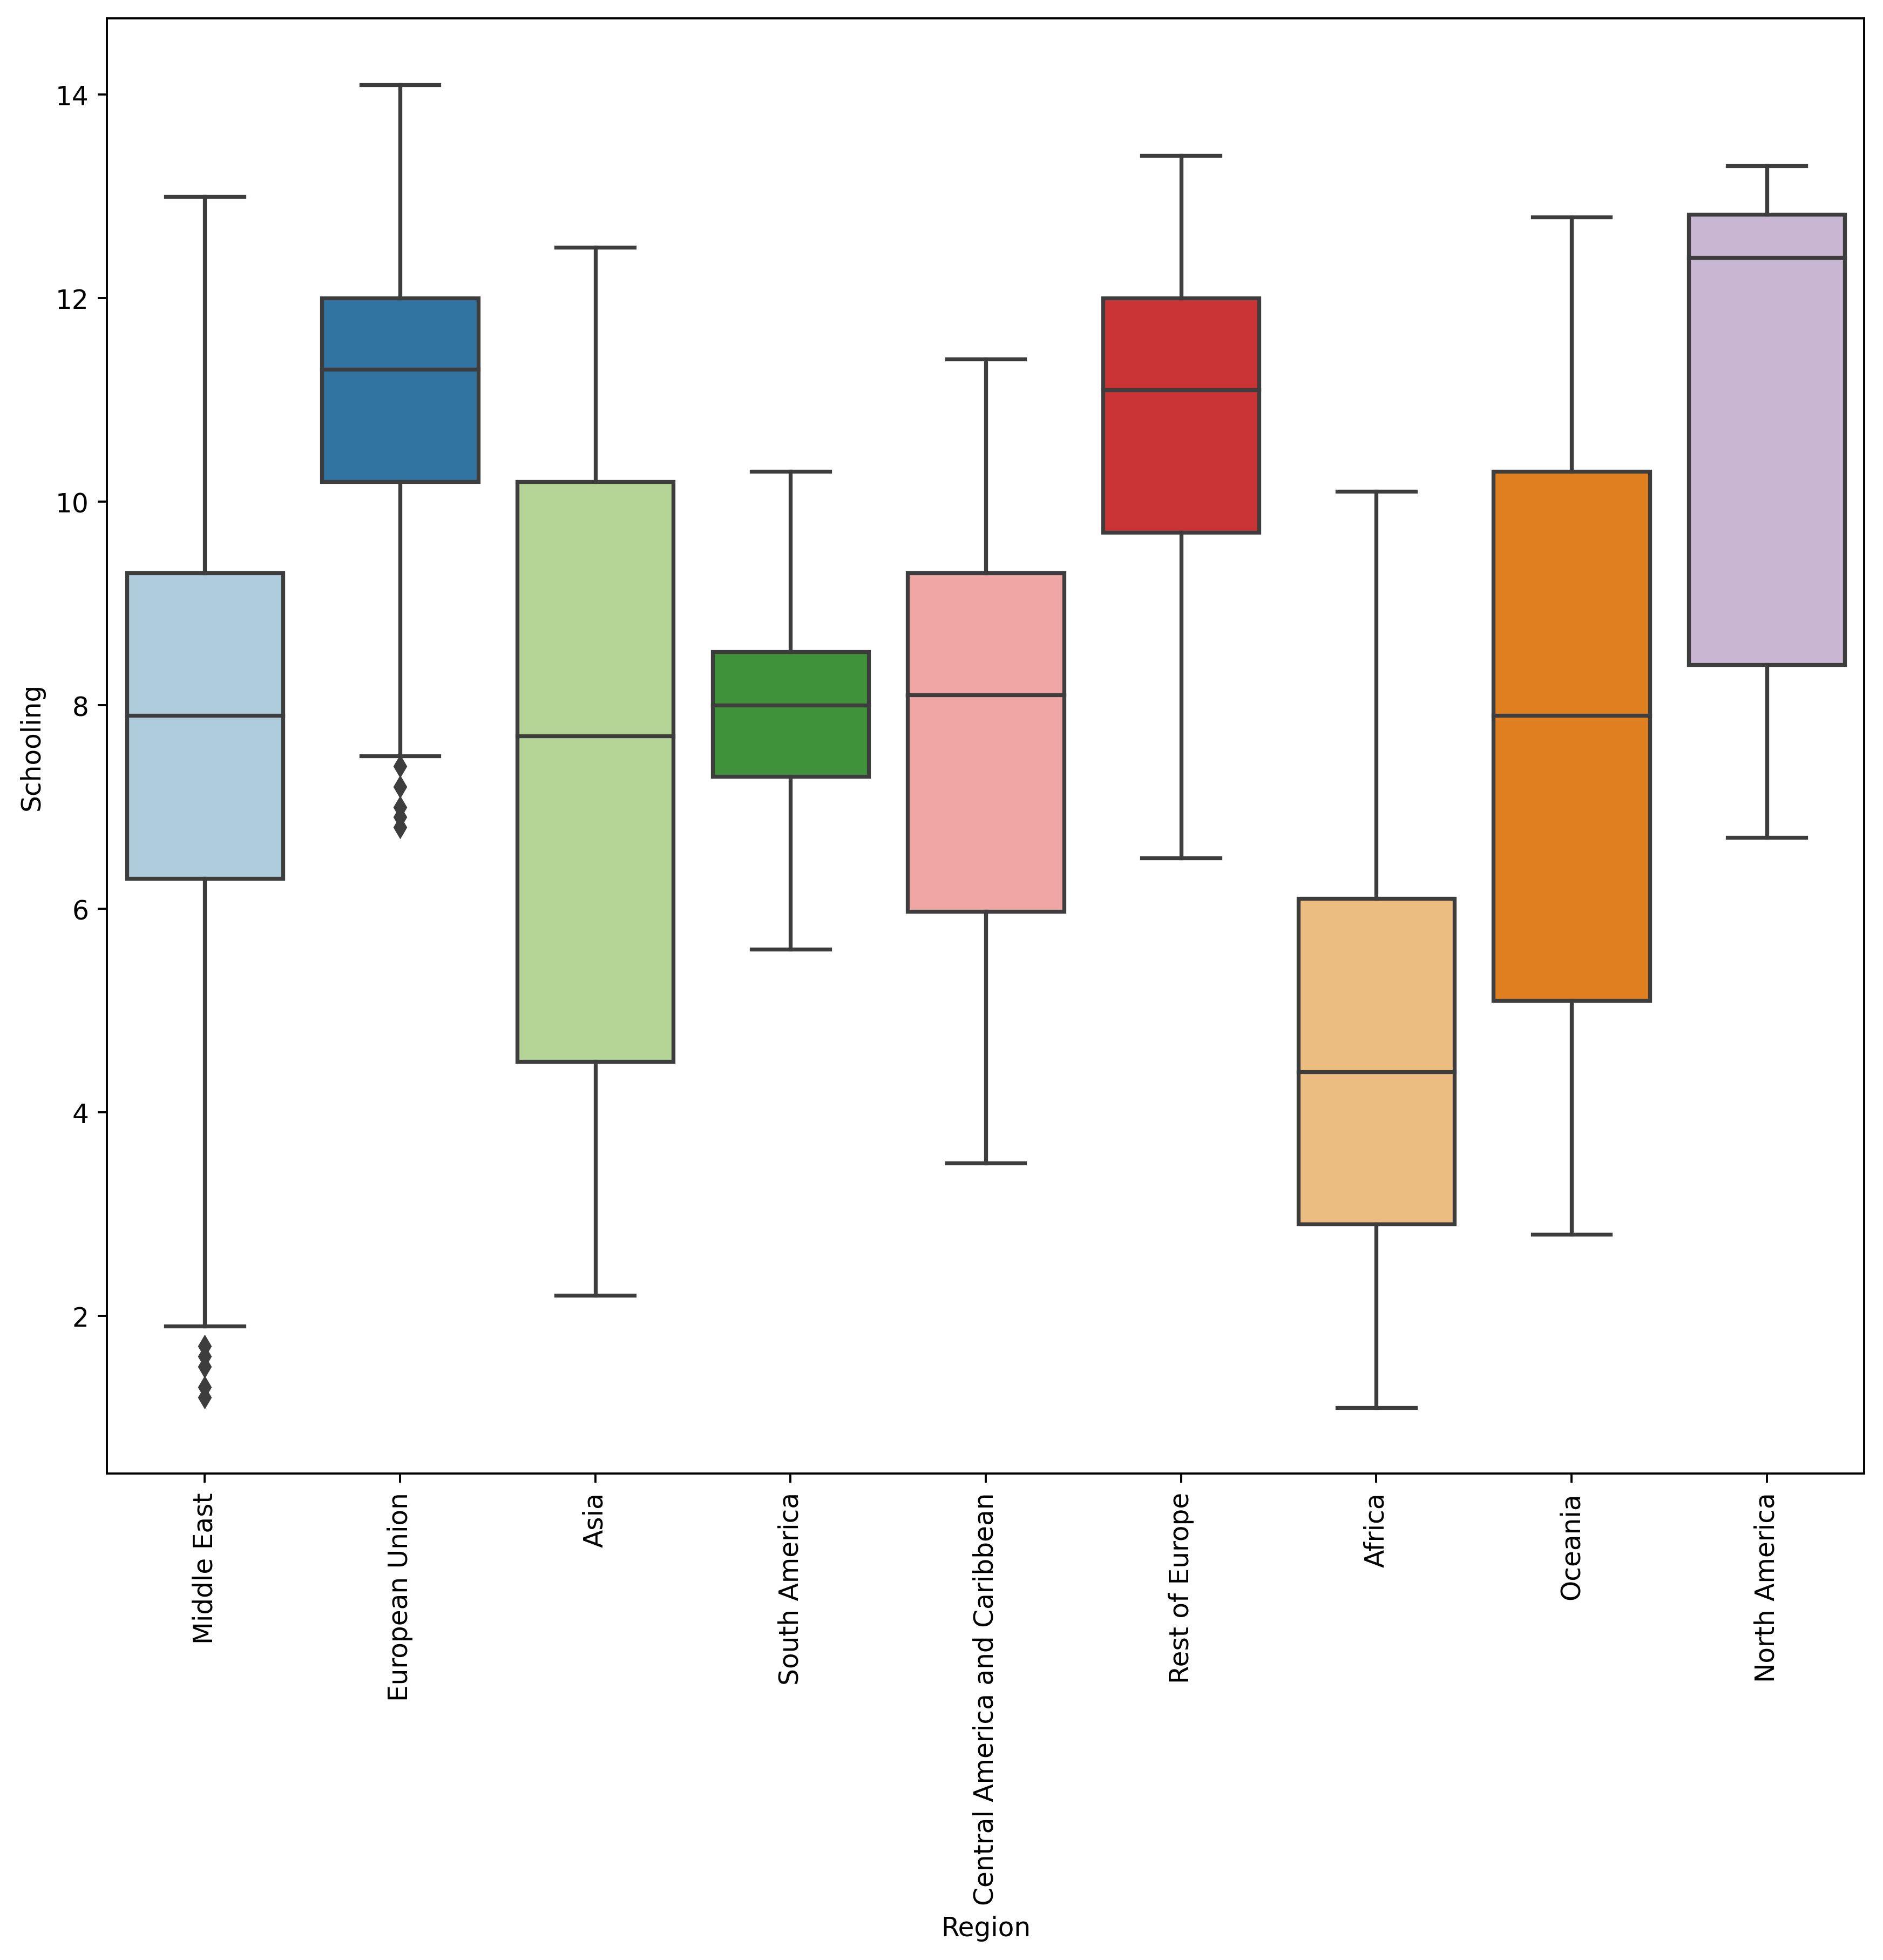

In [9]:
plt.figure(figsize=(12, 10), dpi=350)
sns.boxplot(x=df['Region'], y=df['Schooling'], data=df, palette='Paired')
plt.xticks(rotation=90)

시각화 추가학습

공식문서 : https://seaborn.pydata.org/tutorial.html

## 선형회귀

In [10]:
from sklearn.linear_model import LinearRegression #선형회귀 모듈
from sklearn.model_selection import train_test_split #학습데이터 샘플링 모듈

In [11]:
x = df.iloc[:,2:-2] # 국가명, 지역, 기대수명 제외
x.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed
0,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0
1,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1
2,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0
3,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0
4,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1


In [12]:
y = df.iloc[:,-1]
y.head()

0    76.5
1    82.8
2    65.4
3    67.0
4    81.7
Name: Life_expectancy, dtype: float64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1398)

In [14]:
lr = LinearRegression().fit(x_train, y_train)

In [15]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 2.37180094e-02 -5.12604100e-02 -5.50416433e-02 -4.82160628e-02
  5.35026723e-02 -9.34724913e-03  2.80840486e-03 -1.59440755e-01
  3.85988727e-03 -5.48970710e-04  9.99699008e-02  2.61796172e-05
 -2.07261181e-04 -2.46060676e-02 -1.05871380e-02  8.37039364e-02
  7.14860283e-01]
lr.intercept_: 37.45081778385425


In [16]:
print("훈련 세트 점수: {:.4f}".format(lr.score(x_train, y_train)))
print("테스트 세트 점수: {:.4f}".format(lr.score(x_test, y_test)))

훈련 세트 점수: 0.9796
테스트 세트 점수: 0.9783


## 릿지 회귀

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train)
print("훈련 세트 점수: {:.4f}".format(ridge.score(x_train, y_train)))
print("테스트 세트 점수: {:.4f}".format(ridge.score(x_test, y_test)))

훈련 세트 점수: 0.9796
테스트 세트 점수: 0.9783


In [18]:
ridge100 = Ridge(alpha=100).fit(x_train, y_train)
print("훈련 세트 점수: {:.4f}".format(ridge100.score(x_train, y_train)))
print("테스트 세트 점수: {:.4f}".format(ridge100.score(x_test, y_test)))

훈련 세트 점수: 0.9795
테스트 세트 점수: 0.9784


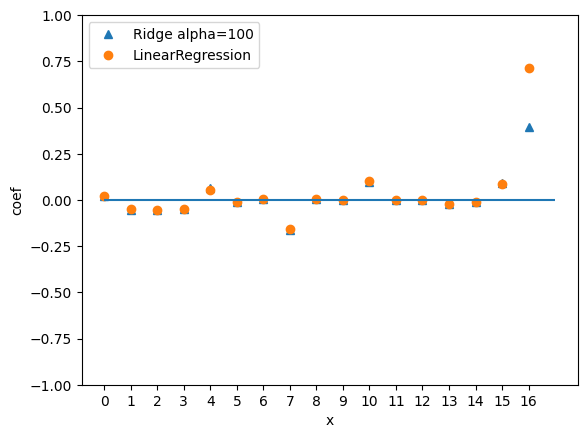

In [19]:
plt.plot(ridge100.coef_, '^', label="Ridge alpha=100")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("x")
plt.ylabel("coef")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-1, 1)
plt.xticks(np.arange(0,17))
plt.legend()

## 라쏘 회귀

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train)
print("훈련 세트 점수: {:.4f}".format(lasso.score(x_train, y_train)))
print("테스트 세트 점수: {:.4f}".format(lasso.score(x_test, y_test)))

print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 특성 : ", end="")
for i in range(len(lasso.coef_)):
  if lasso.coef_[i] != 0:
    print(x.columns[i], end = " / ")

훈련 세트 점수: 0.9771
테스트 세트 점수: 0.9753
사용한 특성의 수: 7
사용한 특성 : Infant_deaths / Under_five_deaths / Adult_mortality / Alcohol_consumption / Hepatitis_B / Measles / GDP_per_capita / 

In [21]:
lasso25 = Lasso(alpha = 25).fit(x_train, y_train)
print("훈련 세트 점수: {:.4f}".format(lasso25.score(x_train, y_train)))
print("테스트 세트 점수: {:.4f}".format(lasso25.score(x_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso25.coef_ != 0)))

print("사용한 특성 : ", end="")
for i in range(len(lasso25.coef_)):
  if lasso25.coef_[i] != 0:
    print(x.columns[i], end = " / ")

훈련 세트 점수: 0.9697
테스트 세트 점수: 0.9678
사용한 특성의 수: 3
사용한 특성 : Under_five_deaths / Adult_mortality / GDP_per_capita / 

Text(0, 0.5, 'coef')

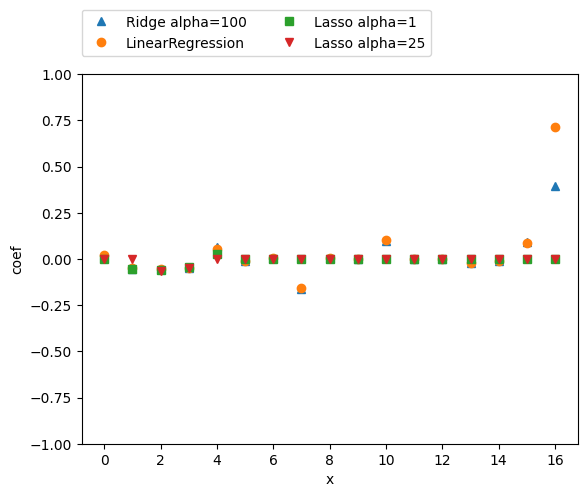

In [22]:
plt.plot(ridge100.coef_, '^', label="Ridge alpha=100")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso25.coef_, 'v', label="Lasso alpha=25")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-1, 1)
plt.xlabel("x")
plt.ylabel("coef")

## 과제

1.   자신의 학번과 이름을 적어주세요.
2.   아래 코드에서 '릿지 회귀나 라쏘 회귀의 alpha값을 조정한 모델'을 하나 새로 추가하세요. (주석 처리된 두 줄의 코드를 완성하시면 됩니다.)
3.   plot이 그려지면 자신의 학번과 이름을 함께 나오도록 캡쳐한 뒤 제출해주세요.



학번 : 2000123456 이름 : 김갑돌


Text(0, 0.5, 'coef')

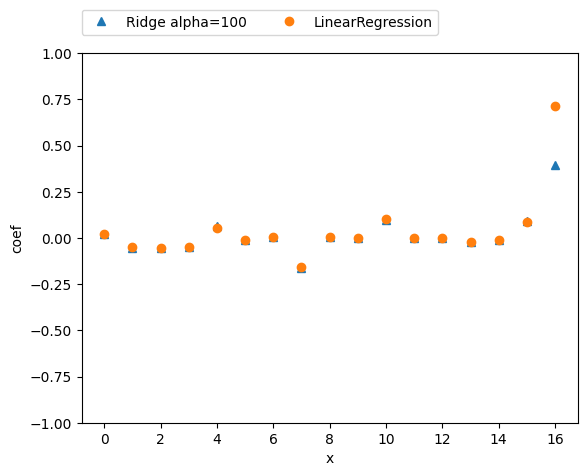

In [23]:
print("학번 : {} 이름 : {}".format("2000123456", "김갑돌"))
# Model(Ridge 혹은 Lasso) 학습
# XXX = Model(alpha = YYY).fit(x_train, y_train)

plt.plot(ridge100.coef_, '^', label="Ridge alpha=100")
plt.plot(lr.coef_, 'o', label="LinearRegression")
# plt.plot(XXX.coef_,'v', label="XXX alpha=YYY")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-1, 1)
plt.xlabel("x")
plt.ylabel("coef")

2020311587 이수현


학번 : 2020311587 이름 : 이수현


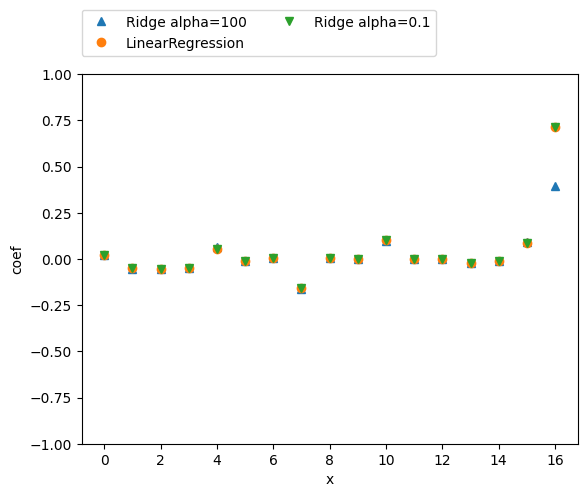

In [24]:
print("학번 : {} 이름 : {}".format("2020311587", "이수현"))

# Model(Ridge 혹은 Lasso) 학습
ridge_alpha = 100  # 적절한 alpha 값으로 조정
ridge_model = Ridge(alpha=ridge_alpha)
ridge_model.fit(x_train, y_train)

lasso_alpha = 0.01  # 적절한 alpha 값으로 조정
lasso_model = Lasso(alpha=lasso_alpha)
lasso_model.fit(x_train, y_train)

# 그래프에 사용할 Ridge 모델 학습
ridge_XXX_alpha = 0.1  # 적절한 alpha 값으로 조정
ridge_XXX_model = Ridge(alpha=ridge_XXX_alpha)
ridge_XXX_model.fit(x_train, y_train)

plt.plot(ridge_model.coef_, '^', label="Ridge alpha=100")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.plot(ridge_XXX_model.coef_, 'v', label="Ridge alpha=0.1")  # XXX 대신 실제 사용할 alpha 값으로 수정

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-1, 1)
plt.xlabel("x")
plt.ylabel("coef")
plt.show()


학번 : 2020311587 이름 : 이수현


NameError: ignored

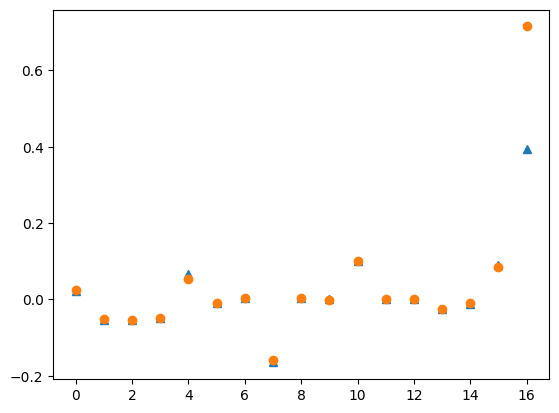

In [25]:
print("학번 : {} 이름 : {}".format("2020311587", "이수현"))
# Model(Ridge 혹은 Lasso) 학습
#XXX = Model(alpha = YYY).fit(x_train, y_train)

plt.plot(ridge100.coef_, '^', label="Ridge alpha=100")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.plot(XXX.coef_,'v', label="XXX alpha=YYY")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-1, 1)
plt.xlabel("x")
plt.ylabel("coef")

학번 : 2020311587 이름 : 이수현


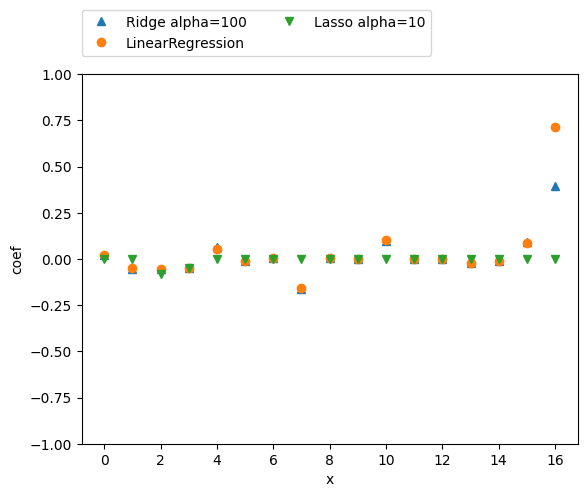

In [43]:
print("학번 : {} 이름 : {}".format("2020311587", "이수현"))

# Import Ridge and Lasso models
from sklearn.linear_model import Ridge, Lasso

# Define the alpha value for the Lasso model
YYY = 10

# Create and train the Lasso model
XXX = Lasso(alpha=YYY).fit(x_train, y_train)

# Create and train the Ridge model
ridge100 = Ridge(alpha=100).fit(x_train, y_train)

# Create and train the LinearRegression model
lr = LinearRegression().fit(x_train, y_train)

# Plot the coefficients of the three models
plt.plot(ridge100.coef_, '^', label="Ridge alpha=100")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.plot(XXX.coef_,'v', label="Lasso alpha=10")

# Add a legend and title to the plot
plt.legend(ncol=2, loc=(0, 1.05))

# Set the y-axis limits to range from -1 to 1
plt.ylim(-1, 1)

# Label the x and y axes
plt.xlabel("x")
plt.ylabel("coef")

# Show the plot
plt.show()
